
### Continued data analysis


### Decision Tree

**Library Imports**

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import the CAD=X currency pair data from the CSV file
df = pd.read_csv('cad_x_currency_data.csv', index_col=0)
df

,Ticker,Open,High,Low,Close,Adj Close,Time
Date,,,,,,,
2008-08-01,CAD=X,1.02340,1.02940,1.02290,1.02460,1.02460,2
2008-08-04,CAD=X,1.02800,1.03680,1.02620,1.03640,1.03640,8
2008-08-05,CAD=X,1.03630,1.04480,1.03630,1.04260,1.04260,14
2008-08-06,CAD=X,1.04260,1.04930,1.04000,1.04750,1.04750,20
2008-08-07,CAD=X,1.04760,1.05330,1.04490,1.05200,1.05200,26
...,...,...,...,...,...,...,...
2023-07-24,CAD=X,1.32240,1.32276,1.31542,1.32240,1.32240,38937
2023-07-25,CAD=X,1.31746,1.32095,1.31466,1.31746,1.31746,38947
2023-07-26,CAD=X,1.31871,1.32352,1.31720,1.31871,1.31871,38957


In [4]:
df.shape

(3905, 7)

In [5]:
df.head()

,Ticker,Open,High,Low,Close,Adj Close,Time
Date,,,,,,,
2008-08-01,CAD=X,1.0234,1.0294,1.0229,1.0246,1.0246,2
2008-08-04,CAD=X,1.0280,1.0368,1.0262,1.0364,1.0364,8
2008-08-05,CAD=X,1.0363,1.0448,1.0363,1.0426,1.0426,14
2008-08-06,CAD=X,1.0426,1.0493,1.0400,1.0475,1.0475,20
2008-08-07,CAD=X,1.0476,1.0533,1.0449,1.0520,1.0520,26


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3905 entries, 2008-08-01 to 2023-07-28
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     3905 non-null   object 
 1   Open       3905 non-null   float64
 2   High       3905 non-null   float64
 3   Low        3905 non-null   float64
 4   Close      3905 non-null   float64
 5   Adj Close  3905 non-null   float64
 6   Time       3905 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 244.1+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Time
count,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000
mean,1.198423,1.202731,1.194271,1.198412,1.198412,19457.018438
std,0.136652,0.136947,0.136378,0.136623,0.136623,11274.606568
min,0.943000,0.947200,0.940600,0.943200,0.943200,2.000000
25%,1.049800,1.054770,1.044800,1.049800,1.049800,9693.000000
50%,1.254420,1.259230,1.250170,1.254400,1.254400,19458.000000
75%,1.315860,1.319310,1.312870,1.315800,1.315800,29218.000000
max,1.458030,1.468730,1.449370,1.457800,1.457800,38977.000000


In [8]:
# Check for missing values in each column
missing_values = df.isna().sum()
print(missing_values)

Ticker       0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Time         0
dtype: int64


In [9]:
X = df[['Open', 'High', 'Low']]  # Features
y = df['Close']  # Target

**Train test split**

Train test split ratio - 80-20

In [10]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Initialize the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

**Model Evaluation**

In [12]:
# Making predictions on the testing set
y_pred = tree_model.predict(X_test)

In [13]:
# Calculating MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MSE: 1.3787701828167626e-05
RMSE: 0.003713179476966825


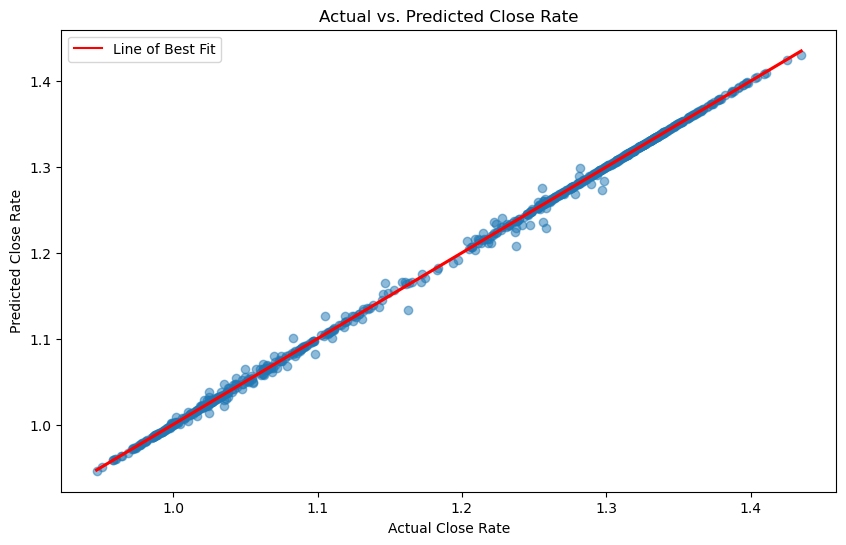

In [14]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Actual Close Rate')
plt.ylabel('Predicted Close Rate')
plt.title('Actual vs. Predicted Close Rate')

# Add a legend
line = plt.Line2D([0,1],[0,0], color='red', linestyle='-')
plt.legend([line], ['Line of Best Fit'])
plt.show()


**Plotting residuals**

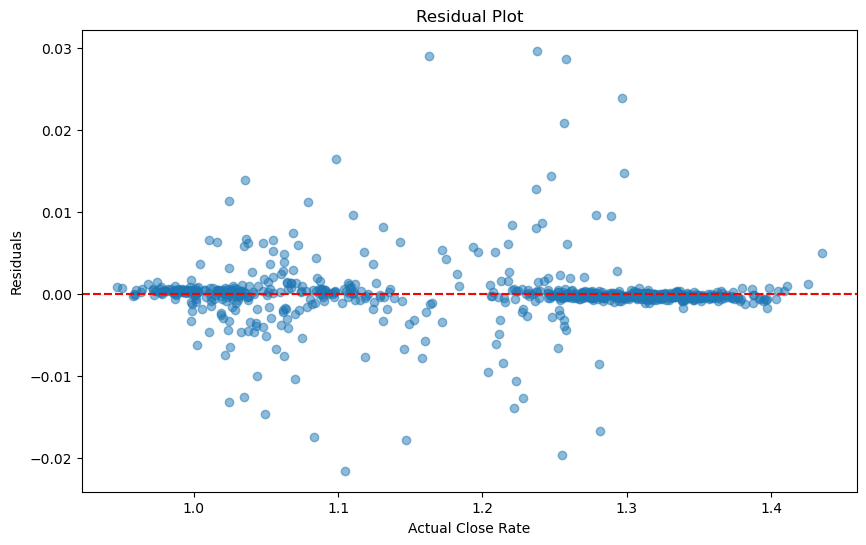

In [15]:
# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=residuals, scatter_kws={'alpha':0.5})
plt.xlabel('Actual Close Rate')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()
